In [507]:

import pymysql
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from PIL import Image, ImageDraw, ImageFont
from urllib.parse import quote 

In [508]:
engine = create_engine(
      "mysql+pymysql://root:%s@localhost/fobos" % quote('118378bdmy@L'))
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='118378bdmy@L',db='fobos')


In [509]:
pagamento_fatura = "PAGAMENTO FATURA INTER" 
query = """SELECT 
    s.STAT_DT_DATE
    ,s.STAT_NM_NAME
    ,s.STAT_NR_VALUE
    ,(SELECT AVG(s1.STAT_NR_VALUE) from fobo_tb_statements s1 WHERE YEAR(s1.STAT_DT_DATE) = 2021 AND s1.STAT_NM_NAME LIKE '%%PAGAMENTO FATURA INTER%%') AS 'AVG_2021'
    ,(SELECT AVG(s2.STAT_NR_VALUE) from fobo_tb_statements s2 WHERE YEAR(s2.STAT_DT_DATE) = 2022 AND s2.STAT_NM_NAME LIKE '%%PAGAMENTO FATURA INTER%%') AS 'AVG_2022'
  from fobo_tb_statements s where 
  s.STAT_NM_NAME LIKE '%%PAGAMENTO FATURA INTER%%'
  ORDER BY s.STAT_DT_DATE"""
df = pd.read_sql(query, engine)


In [510]:
df["STAT_DT_DATE"] = pd.to_datetime(df["STAT_DT_DATE"]).dt.strftime("%m/%Y")


C:\Users\almer\AppData\Local\Temp\ipykernel_2356\438652896.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  line_avg_2021 = ax.plot(df['STAT_DT_DATE'], df['AVG_2021'] * -1, 'g--',  color='#f799b5', label='Média 2021')
C:\Users\almer\AppData\Local\Temp\ipykernel_2356\438652896.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  line_avg_2022 = ax.plot(df['STAT_DT_DATE'], df['AVG_2022'] * -1, 'g--', color='#c8f799', label='Média 2022')


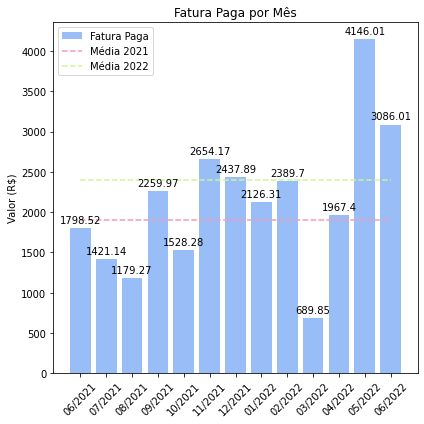

In [511]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title('Fatura Paga por Mês')
ax.set_ylabel("Valor (R$)")

bar = ax.bar(df['STAT_DT_DATE'], df['STAT_NR_VALUE'] * -1, color='#99bdf7', label='Fatura Paga')
line_avg_2021 = ax.plot(df['STAT_DT_DATE'], df['AVG_2021'] * -1, 'g--',  color='#f799b5', label='Média 2021')
line_avg_2022 = ax.plot(df['STAT_DT_DATE'], df['AVG_2022'] * -1, 'g--', color='#c8f799', label='Média 2022')

ax.bar_label(bar, padding=3)

ax.legend(handles=[bar, line_avg_2021[0], line_avg_2022[0]], loc='upper left')
plt.xticks(df['STAT_DT_DATE'], rotation=45)
plt.tight_layout()
plt.savefig('graph_invoice_of_the_month.png',dpi=300, facecolor='white', bbox_inches="tight")

In [512]:
avg_2021 = round((df["AVG_2021"][0] * -1), 2)
avg_2022 = round((df["AVG_2022"][0] * -1), 2)
diff_avg = round(abs(avg_2021 - avg_2022), 2)
is_positive_evolution = True if (avg_2021 > avg_2022) else False

In [513]:
text_resume = """
MÉDIA 2021: %s reais
MÉDIA 2022: %s reais
DIFERENÇA ENTRE AS MÉDIAS: %s reais
%s"""

text = text_resume % (avg_2021, avg_2022, diff_avg, 
  ("EVELUÇÃO POSITIVA" if is_positive_evolution else "EVOLUÇÃO NEGATIVA"))

font_family = "arial.ttf"
width_ratio = 0.5

im_iofm = Image.open("graph_invoice_of_the_month.png")
im_iofm_size = im_iofm.size


In [514]:
text_image = Image.new('RGB', (im_iofm_size[0], 400), color ='#99bdf7')
font = ImageFont.truetype(font_family, 40)

d = ImageDraw.Draw(text_image)
d.text((30,30), text, fill=(0,0,0), font=font)

text_image.save('text_invoice_of_the_month.png')

In [515]:
im_text = Image.open("text_invoice_of_the_month.png")
im_text_size = im_text.size

new_im = Image.new('RGB', (im_iofm_size[0], + im_text_size[1] + im_iofm_size[1]), (250,250,250))

new_im.paste (im_iofm, (0,0))
new_im.paste(im_text, (0, im_iofm_size[1]))

new_im.save("invoice_of_the_month.png", "PNG")